<h1><center>Supervised ML Regression Competition</center></h1>


<img align="center" src="https://compraracciones.com/wp-content/uploads/2021/04/insurance.jpg" style="height:200px" style="width:100px"/>

<hr style="border:2px solid pink"> </hr>

You have been assigned the task of building a model that will predict the insurance cost

You'll find the data in the csv file `insurance`


- target col: "charges"


<hr style="border:2px solid pink"> </hr>


**Guidelines:** 


- train_test_split
    - random state = 42
    - test size = 0.3


- The one who gets the highest r2-score on test data wins


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the insurance dataset
insurance = pd.read_csv("insurance.csv")

## 1. Initial Data Exploration

Let's start by loading our dataset and taking a first look at it.


In [3]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,7725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance.dtypes
# sex, smoker, region are categorical
y = insurance['charges']
X = insurance.drop(columns='charges')

## 2. Checking for Missing Values

It's important to know if our data has any missing values. Let's check that next.


In [5]:
print(insurance.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64



## 3. Descriptive Statistics

Now, let's move on to some descriptive statistics.

Understanding the distribution of our data is crucial. Let's calculate some descriptive statistics.


In [6]:
# Basic descriptive statistics for all numeric columns
print("Basic Statistics:")
print(insurance.describe())

# Additional statistics for specific features
print("\nMode for categorical variables:")
print(insurance[['sex', 'smoker', 'region']].mode())

print("\nValue counts for categorical variables:")
print("\nSex distribution:")
print(insurance['sex'].value_counts(normalize=True))
print("\nSmoker distribution:")
print(insurance['smoker'].value_counts(normalize=True))
print("\nRegion distribution:")
print(insurance['region'].value_counts(normalize=True))

# Specific statistics for the target variable 'charges'
print("\nTarget Variable (charges) Statistics:")
print(f"Median charges: ${insurance['charges'].median():,.2f}")
print(f"Skewness: {insurance['charges'].skew():,.2f}")
print(f"Kurtosis: {insurance['charges'].kurtosis():,.2f}")

# Distribution of children
print("\nChildren distribution:")
print(insurance['children'].value_counts().sort_index())

Basic Statistics:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  15799.570247
std      14.049960     6.098187     1.205493  12559.984021
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   8106.480000
50%      39.000000    30.400000     1.000000  12403.585225
75%      51.000000    34.693750     2.000000  18948.612903
max      64.000000    53.130000     5.000000  64571.074480

Mode for categorical variables:
    sex smoker     region
0  male     no  southeast

Value counts for categorical variables:

Sex distribution:
sex
male      0.505232
female    0.494768
Name: proportion, dtype: float64

Smoker distribution:
smoker
no     0.795217
yes    0.204783
Name: proportion, dtype: float64

Region distribution:
region
southeast    0.272048
southwest    0.242900
northwest    0.242900
northeast    0.242152
Name: proportion, dt

## 4. Distribution Analysis

Visualizing the distributions of our features can provide valuable insights. Let's plot the distributions for 'age', 'bmi', and 'charges'.

### Task:
- Plot the histogram for 'age'
- Plot the histogram for 'bmi'
- Plot the histogram for 'charges'


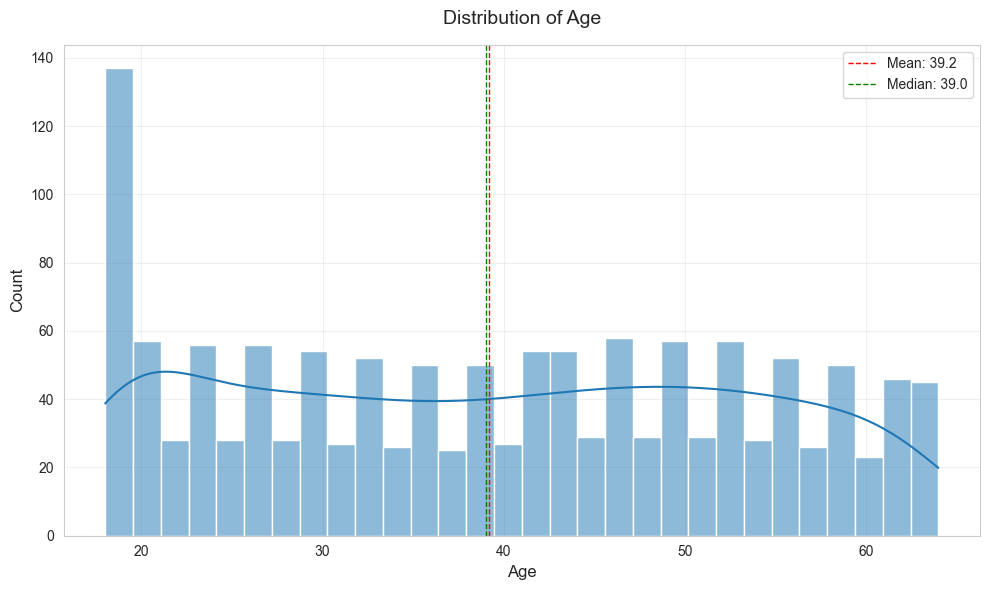

An exponential distribution?


In [7]:
import seaborn as sns

# Set the style for better visualization
sns.set_style("whitegrid") 

# Create figure with specific size
plt.figure(figsize=(10, 6))

# Create histogram with seaborn
sns.histplot(data=insurance, x='age', bins=30, kde=True)

# Customize the plot
plt.title('Distribution of Age', fontsize=14, pad=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add mean and median lines
plt.axvline(insurance['age'].mean(), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {insurance["age"].mean():.1f}')
plt.axvline(insurance['age'].median(), color='green', linestyle='dashed', linewidth=1, label=f'Median: {insurance["age"].median():.1f}')

# Add legend
plt.legend()

# Show grid
plt.grid(True, alpha=0.3)

# Show plot
plt.tight_layout()
plt.show()

print("An exponential distribution?")

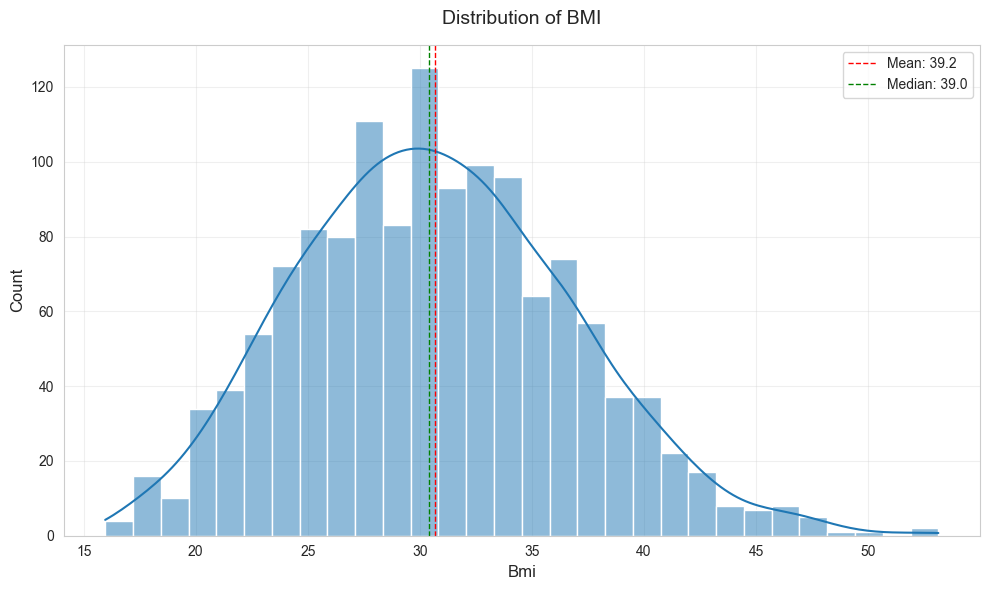

A normal distribution?


In [8]:
import seaborn as sns

# Set the style for better visualization
sns.set_style("whitegrid") 

# Create figure with specific size
plt.figure(figsize=(10, 6))

# Create histogram with seaborn
sns.histplot(data=insurance, x='bmi', bins=30, kde=True)

# Customize the plot
plt.title('Distribution of BMI', fontsize=14, pad=15)
plt.xlabel('Bmi', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add mean and median lines
plt.axvline(insurance['bmi'].mean(), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {insurance["age"].mean():.1f}')
plt.axvline(insurance['bmi'].median(), color='green', linestyle='dashed', linewidth=1, label=f'Median: {insurance["age"].median():.1f}')

# Add legend
plt.legend()

# Show grid
plt.grid(True, alpha=0.3)

# Show plot
plt.tight_layout()
plt.show()

print("A normal distribution?")

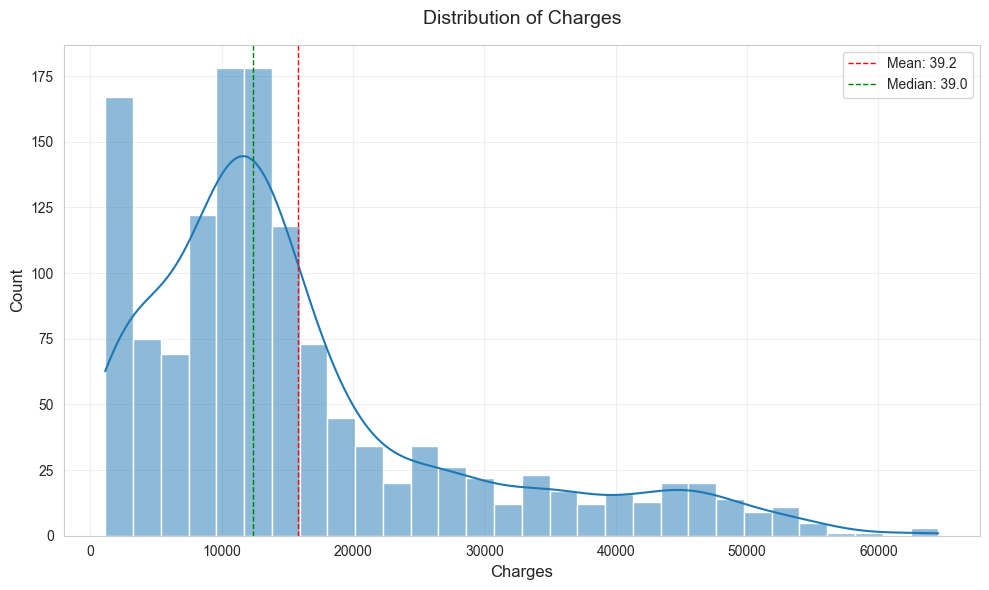

With some outliers, it looks like a gamma distribution, right skewed distribution


In [9]:
import seaborn as sns

# Set the style for better visualization
sns.set_style("whitegrid") 

# Create figure with specific size
plt.figure(figsize=(10, 6))

# Create histogram with seaborn
sns.histplot(data=insurance, x='charges', bins=30, kde=True)

# Customize the plot
plt.title('Distribution of Charges', fontsize=14, pad=15)
plt.xlabel('Charges', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add mean and median lines
plt.axvline(insurance['charges'].mean(), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {insurance["age"].mean():.1f}')
plt.axvline(insurance['charges'].median(), color='green', linestyle='dashed', linewidth=1, label=f'Median: {insurance["age"].median():.1f}')

# Add legend
plt.legend()

# Show grid
plt.grid(True, alpha=0.3)

# Show plot
plt.tight_layout()
plt.show()

print("With some outliers, it looks like a gamma distribution, right skewed distribution")

## 5. Relationship Between Variables

Let's explore the relationship between some of our features and the target variable 'charges'. We'll create scatter plots to visualize these relationships.

### Task:
- Create a scatter plot for 'age' vs 'charges'
- Create a scatter plot for 'bmi' vs 'charges'
- Create a scatter plot for 'children' vs 'charges'


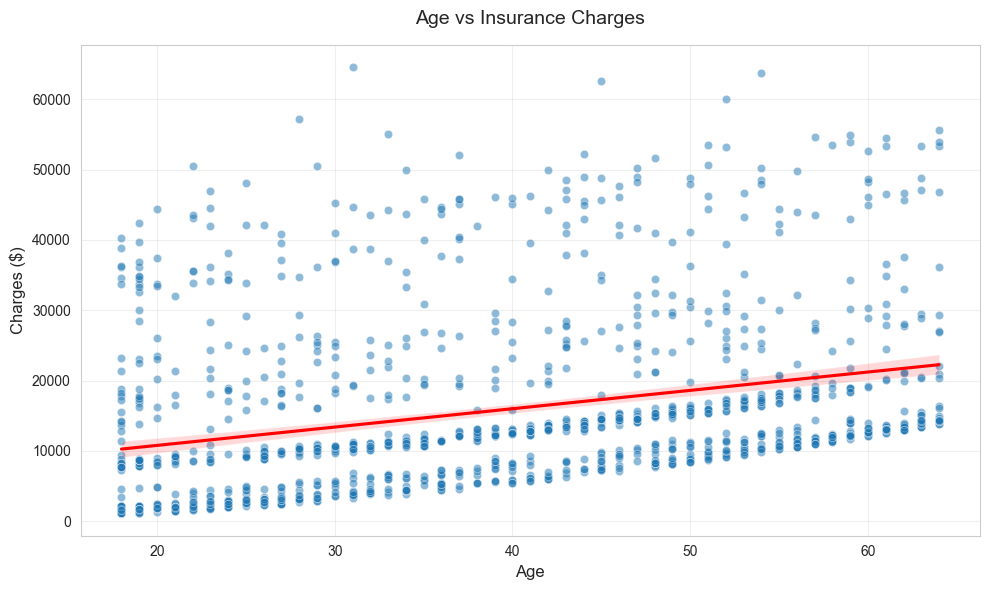

Correlation coefficient between age and charges: 0.292


In [10]:
# Set the style for better visualization
sns.set_style("whitegrid")

# Create figure with specific size
plt.figure(figsize=(10, 6))

# Create scatter plot with seaborn
sns.scatterplot(data=insurance, x='age', y='charges', alpha=0.5)

# Add a regression line
sns.regplot(data=insurance, x='age', y='charges', scatter=False, color='red')

# Customize the plot
plt.title('Age vs Insurance Charges', fontsize=14, pad=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Charges ($)', fontsize=12)

# Show grid
plt.grid(True, alpha=0.3)

# Show plot
plt.tight_layout()
plt.show()

# Calculate correlation coefficient
correlation = insurance['age'].corr(insurance['charges'])
print(f"Correlation coefficient between age and charges: {correlation:.3f}")

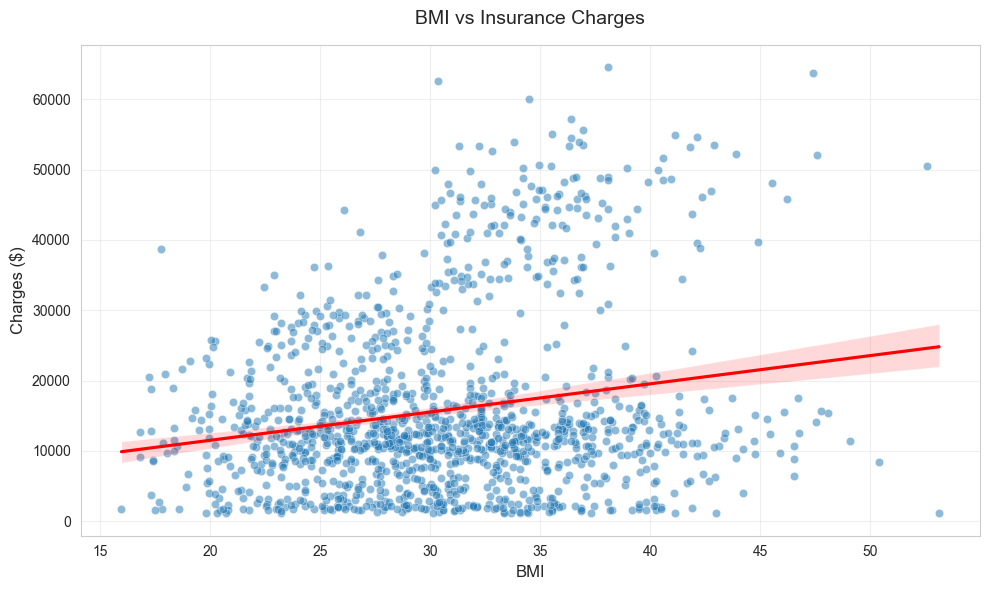

Correlation coefficient between bmi and charges: 0.195


In [11]:
# Set the style for better visualization
sns.set_style("whitegrid")

# Create figure with specific size
plt.figure(figsize=(10, 6))

# Create scatter plot with seaborn
sns.scatterplot(data=insurance, x='bmi', y='charges', alpha=0.5)

# Add a regression line
sns.regplot(data=insurance, x='bmi', y='charges', scatter=False, color='red')

# Customize the plot
plt.title('BMI vs Insurance Charges', fontsize=14, pad=15)
plt.xlabel('BMI', fontsize=12)
plt.ylabel('Charges ($)', fontsize=12)

# Show grid
plt.grid(True, alpha=0.3)

# Show plot
plt.tight_layout()
plt.show()

# Calculate correlation coefficient
correlation = insurance['bmi'].corr(insurance['charges'])
print(f"Correlation coefficient between bmi and charges: {correlation:.3f}")

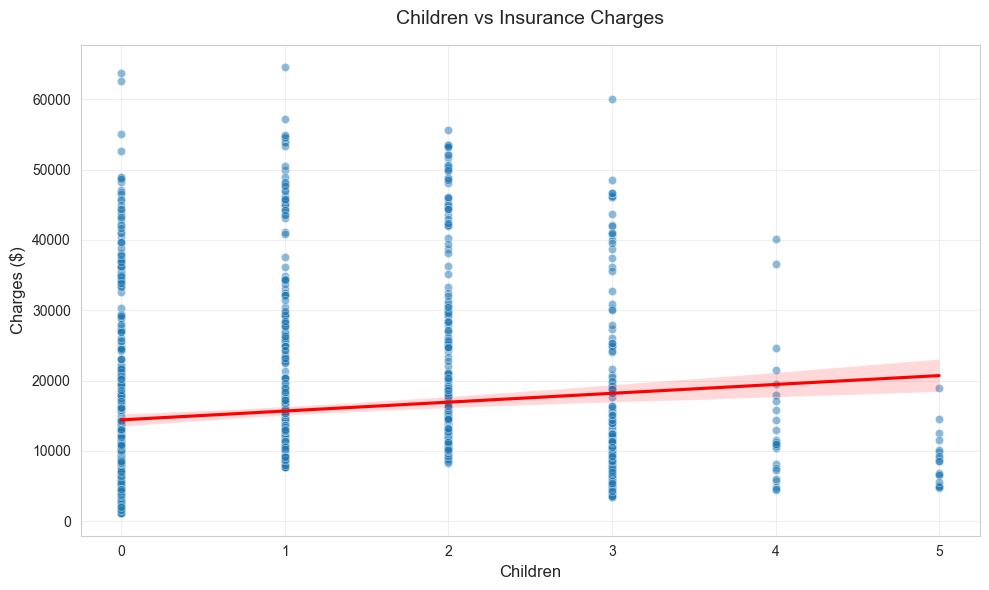

Correlation coefficient between children and charges: 0.121
Age > bmi > children


In [12]:
# Set the style for better visualization
sns.set_style("whitegrid")

# Create figure with specific size
plt.figure(figsize=(10, 6))

# Create scatter plot with seaborn
sns.scatterplot(data=insurance, x='children', y='charges', alpha=0.5)

# Add a regression line
sns.regplot(data=insurance, x='children', y='charges', scatter=False, color='red')

# Customize the plot
plt.title('Children vs Insurance Charges', fontsize=14, pad=15)
plt.xlabel('Children', fontsize=12)
plt.ylabel('Charges ($)', fontsize=12)

# Show grid
plt.grid(True, alpha=0.3)

# Show plot
plt.tight_layout()
plt.show()

# Calculate correlation coefficient
correlation = insurance['children'].corr(insurance['charges'])
print(f"Correlation coefficient between children and charges: {correlation:.3f}")
print("Age > bmi > children")

## 6. Categorical Analysis

Let's analyze the categorical features 'sex', 'smoker', and 'region' to see how they relate to 'charges'.

### Task:
- Plot the distribution of 'charges' for different 'sex'
- Plot the distribution of 'charges' for different 'smoker'
- Plot the distribution of 'charges' for different 'region'


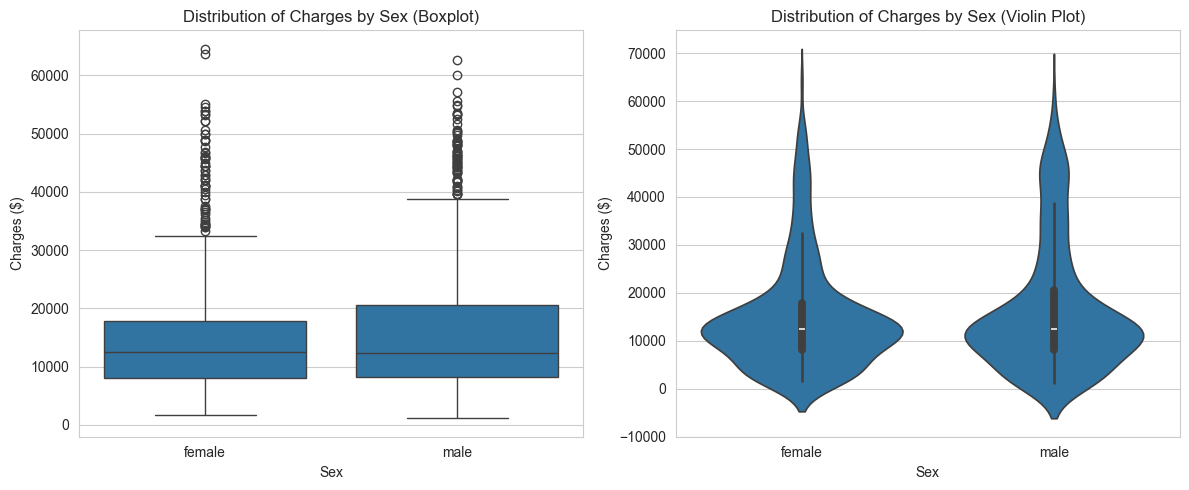


Mean charges by sex:
sex
female    15080.152862
male      16504.088456
Name: charges, dtype: float64

Median charges by sex:
sex
female    12477.530125
male      12376.462425
Name: charges, dtype: float64


In [13]:
# Set the style and figure size
plt.figure(figsize=(12, 5))

# Create a subplot with 1 row and 2 columns
plt.subplot(1, 2, 1)
# Create boxplot
sns.boxplot(data=insurance, x='sex', y='charges')
plt.title('Distribution of Charges by Sex (Boxplot)', fontsize=12)
plt.xlabel('Sex', fontsize=10)
plt.ylabel('Charges ($)', fontsize=10)

# Create violin plot
plt.subplot(1, 2, 2)
sns.violinplot(data=insurance, x='sex', y='charges')
plt.title('Distribution of Charges by Sex (Violin Plot)', fontsize=12)
plt.xlabel('Sex', fontsize=10)
plt.ylabel('Charges ($)', fontsize=10)

# Adjust layout and display
plt.tight_layout()
plt.show()

# Print statistical summary
print("\nMean charges by sex:")
print(insurance.groupby('sex')['charges'].mean())
print("\nMedian charges by sex:")
print(insurance.groupby('sex')['charges'].median())

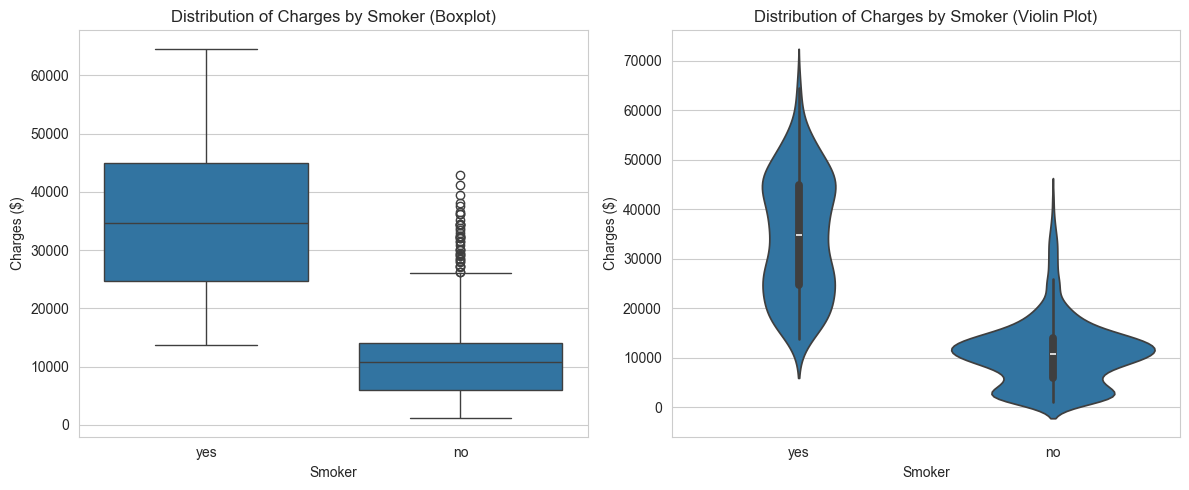


Mean charges by smoker:
smoker
no     10960.584087
yes    34590.377817
Name: charges, dtype: float64

Median charges by smoker:
smoker
no     10764.1755
yes    34725.8811
Name: charges, dtype: float64


In [14]:
# Set the style and figure size
plt.figure(figsize=(12, 5))

# Create a subplot with 1 row and 2 columns
plt.subplot(1, 2, 1)
# Create boxplot
sns.boxplot(data=insurance, x='smoker', y='charges')
plt.title('Distribution of Charges by Smoker (Boxplot)', fontsize=12)
plt.xlabel('Smoker', fontsize=10)
plt.ylabel('Charges ($)', fontsize=10)

# Create violin plot
plt.subplot(1, 2, 2)
sns.violinplot(data=insurance, x='smoker', y='charges')
plt.title('Distribution of Charges by Smoker (Violin Plot)', fontsize=12)
plt.xlabel('Smoker', fontsize=10)
plt.ylabel('Charges ($)', fontsize=10)

# Adjust layout and display
plt.tight_layout()
plt.show()

# Print statistical summary
print("\nMean charges by smoker:")
print(insurance.groupby('smoker')['charges'].mean())
print("\nMedian charges by smoker:")
print(insurance.groupby('smoker')['charges'].median())

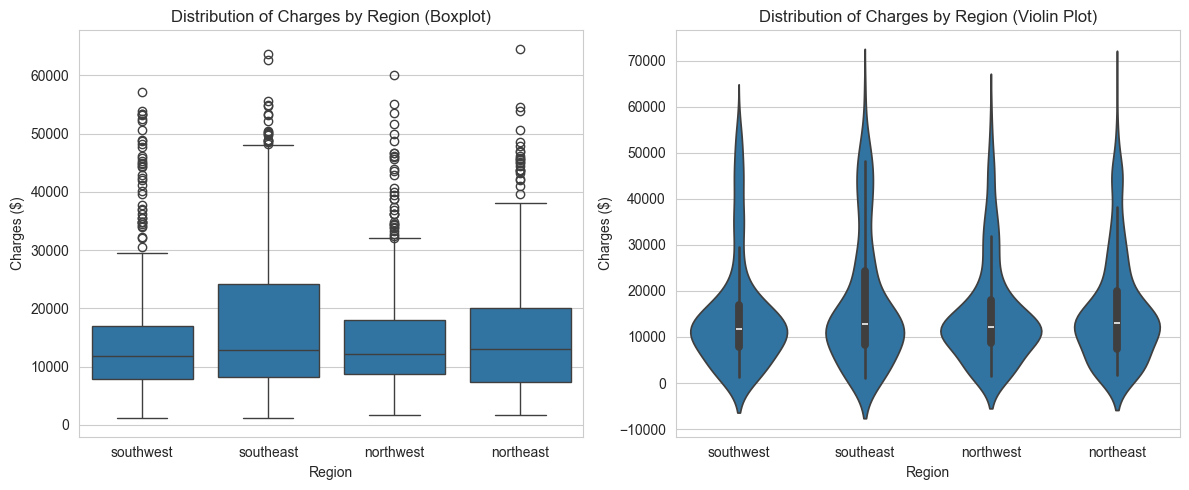


Mean charges by region:
region
northeast    15776.754887
northwest    15002.190759
southeast    17389.257591
southwest    14839.245070
Name: charges, dtype: float64

Median charges by region:
region
northeast    13103.396425
northwest    12123.568800
southeast    12775.773350
southwest    11741.726000
Name: charges, dtype: float64


In [15]:
# Set the style and figure size
plt.figure(figsize=(12, 5))

# Create a subplot with 1 row and 2 columns
plt.subplot(1, 2, 1)
# Create boxplot
sns.boxplot(data=insurance, x='region', y='charges')
plt.title('Distribution of Charges by Region (Boxplot)', fontsize=12)
plt.xlabel('Region', fontsize=10)
plt.ylabel('Charges ($)', fontsize=10)

# Create violin plot
plt.subplot(1, 2, 2)
sns.violinplot(data=insurance, x='region', y='charges')
plt.title('Distribution of Charges by Region (Violin Plot)', fontsize=12)
plt.xlabel('Region', fontsize=10)
plt.ylabel('Charges ($)', fontsize=10)

# Adjust layout and display
plt.tight_layout()
plt.show()

# Print statistical summary
print("\nMean charges by region:")
print(insurance.groupby('region')['charges'].mean())
print("\nMedian charges by region:")
print(insurance.groupby('region')['charges'].median())

## 7. Correlation Analysis

To understand how our numerical features relate to each other and to the target variable, let's calculate and visualize the correlation matrix.

### Task:
- Calculate the correlation matrix for the dataset
- Visualize the correlation matrix using a heatmap


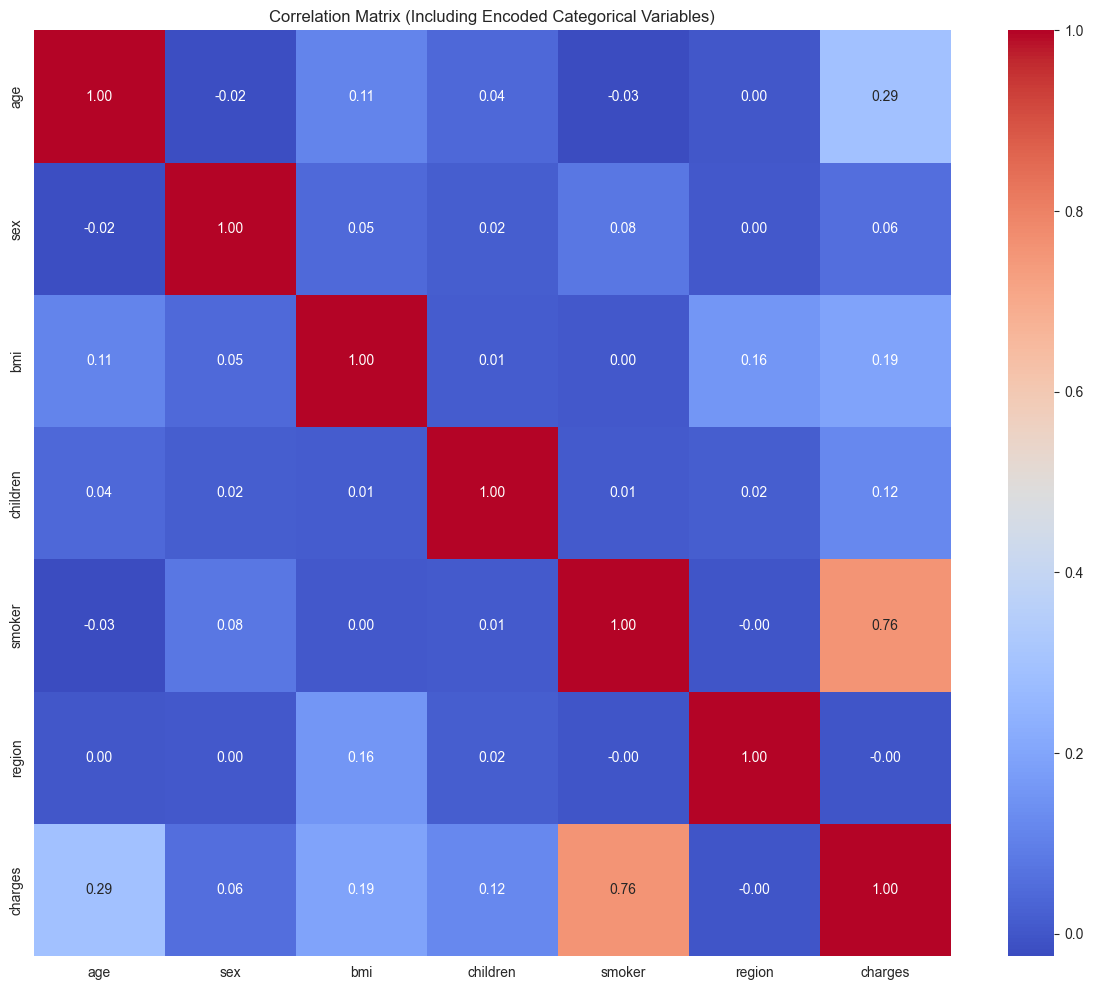

In [16]:
# Optional: If you want to include encoded categorical variables
from sklearn.preprocessing import LabelEncoder

# Create a copy of the dataframe
insurance_encoded = insurance.copy()

# Encode categorical variables
categorical_cols = ['sex', 'smoker', 'region']
le = LabelEncoder()

for col in categorical_cols:
    insurance_encoded[col] = le.fit_transform(insurance_encoded[col])

# Now create correlation matrix with all columns
corr_matrix_all = insurance_encoded.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_all, 
            annot=True, 
            cmap="coolwarm", 
            linecolor="white", 
            fmt='.2f')

plt.title('Correlation Matrix (Including Encoded Categorical Variables)')
plt.tight_layout()
plt.show()

# Modelling time!

## 1. Find the Naive Baseline

Before we build any models, let's establish a naive baseline. This will help us understand how well our models perform compared to a simple approach. In regression problems, the naive baseline is often the mean of the target variable.

### Task:
- Calculate the mean of the target variable 'charges'
- Explain why it's important to establish a naive baseline


In [17]:

# Calculate basic statistics for our naive baseline
mean_charge = insurance['charges'].mean()
median_charge = insurance['charges'].median()
std_charge = insurance['charges'].std()

print(f"Naive Baseline Statistics:")
print(f"Mean Charge (Naive Baseline): ${mean_charge:,.2f}")
print(f"Median Charge: ${median_charge:,.2f}")
print(f"Standard Deviation: ${std_charge:,.2f}")
print("\nThis baseline suggests that if we simply predicted the mean charge")
print(f"for every customer, we would be off by ${std_charge:,.2f} on average.")

Naive Baseline Statistics:
Mean Charge (Naive Baseline): $15,799.57
Median Charge: $12,403.59
Standard Deviation: $12,559.98

This baseline suggests that if we simply predicted the mean charge
for every customer, we would be off by $12,559.98 on average.


## 2. Initial Modelling Without GridSearch or Pipeline

Let's build a simple linear regression model without any feature engineering, grid search, or pipeline. This will serve as our initial baseline for comparison.

### Task:
- Split the data into training and test sets
- Train a simple linear regression model
- Evaluate its performance using regression metrics
- Write it down as a markdown below so you can keep track. This is a scientific experiment


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = insurance.drop('charges', axis=1)
y = insurance['charges']

le = LabelEncoder()
categorical_cols = ['sex', 'smoker', 'region']
for col in categorical_cols:
    X[col] = le.fit_transform(X[col])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Test R2 Score. A {r2:.4f} variance is explained by my model")
print(f"Training R²: {r2_score(y_train, model.predict(X_train)):.4f}")
print(f"RMSE. In average, predictions are off by: ${rmse:,.2f}")

Test R2 Score. A 0.7430 variance is explained by my model
Training R²: 0.7004
RMSE. In average, predictions are off by: $6,520.88


/Users/enriqueestevezalvarez/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/enriqueestevezalvarez/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/enriqueestevezalvarez/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/enriqueestevezalvarez/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/enriqueestevezalvarez/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/enriqueestevezal

## 3. Feature Engineering

Now, let's brainstorm and create some new features to see if we can improve the model's performance.

### Questions:
1. Should we create an interaction feature between 'bmi' and 'children'? 
No, we shouldn't. The correlation is of 0.1, too low.
2. Should we create age groups to see if the model improves by categorizing age?
Age is a discrete variable, we don't need to do that.
3. Should we create a high-risk indicator based on 'smoker' and 'bmi'?
It doesn't seem to be a correlation between BMI and charges, but yes for smoker.

- Remember nothing is set in stone, this is your experiment, your hypothesis. You may not need to, but its important to explore these questions

### Task:
- Create new features based on the questions above
- Explain the rationale behind each feature



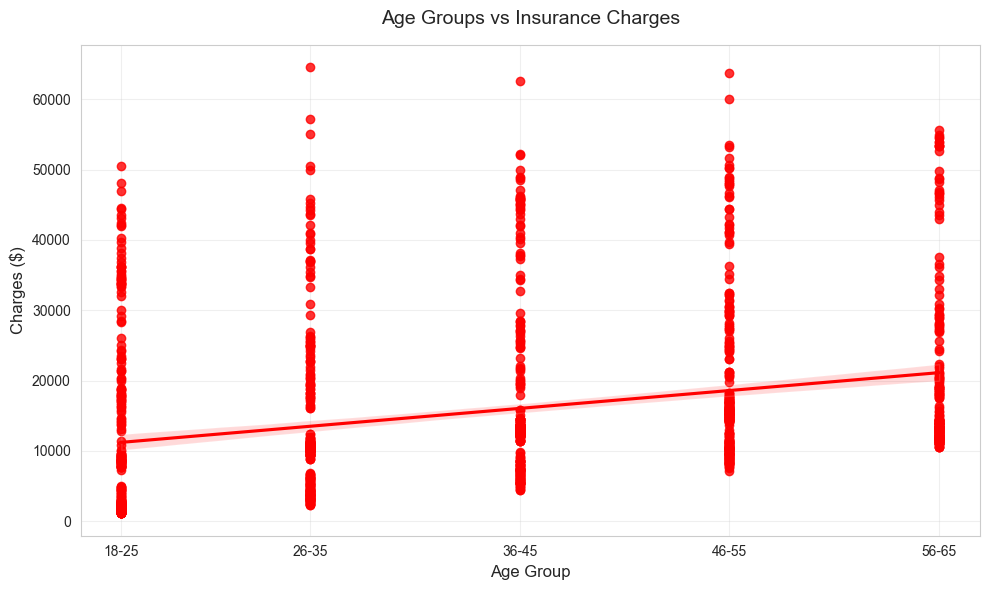

In [22]:
age_group_means = {
    '18-25': 21.5,
    '26-35': 30.5,
    '36-45': 40.5,
    '46-55': 50.5,
    '56-65': 60.5
}
insurance['age_group_numeric'] = insurance['age_group'].map(age_group_means)

# Set the style for better visualization
plt.figure(figsize=(10, 6))

# Create scatter plot with numeric values
sns.regplot(data=insurance, 
            x='age_group_numeric',  # Use numeric version
            y='charges', 
            scatter=True,
            color='red')

# Customize the plot
plt.title('Age Groups vs Insurance Charges', fontsize=14, pad=15)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Charges ($)', fontsize=12)

# Set x-axis ticks to show original group labels
plt.xticks([21.5, 30.5, 40.5, 50.5, 60.5],  # Position of ticks
           ['18-25', '26-35', '36-45', '46-55', '56-65'])  # Labels

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

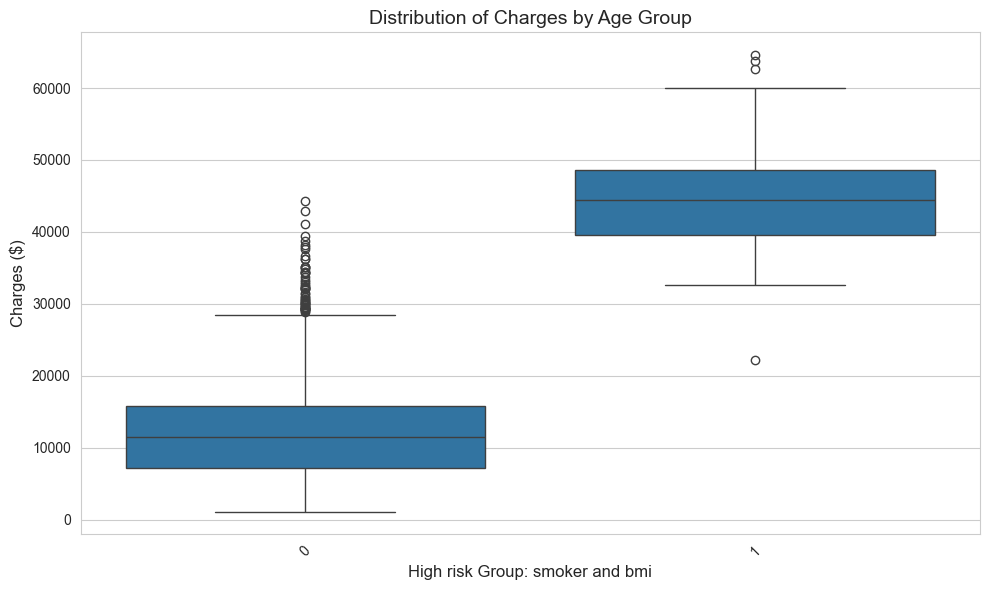

In [24]:
# Create high risk indicator
insurance['high_risk'] = ((insurance['bmi'] >= 30) & (insurance['smoker'] == 'yes')).astype(int)

# You can also create BMI categories
insurance['bmi_category'] = pd.cut(insurance['bmi'],
                                 bins=[0, 18.5, 24.9, 29.9, float('inf')],
                                 labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

plt.figure(figsize=(10, 6))
sns.boxplot(data=insurance, x='high_risk', y='charges')
plt.title('Distribution of Charges by Age Group', fontsize=14)
plt.xlabel('High risk Group: smoker and bmi', fontsize=12)
plt.ylabel('Charges ($)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 4. Modelling with Feature Engineering

Now that we have new features, let's see if they improve our model's performance.
Did it improve the performance? Yes? No? Why

### Task:
- Split the data into training and test sets
- Train a linear regression model with the new features
- Evaluate its performance using regression metrics


In [26]:
# Create age groups
insurance['age_group'] = pd.cut(insurance['age'], 
                               bins=[17, 25, 35, 45, 55, 65],
                               labels=['18-25', '26-35', '36-45', '46-55', '56-65'])

# Create BMI categories and high risk indicator
insurance['bmi_category'] = pd.cut(insurance['bmi'],
                                 bins=[0, 18.5, 24.9, 29.9, float('inf')],
                                 labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

# Create high risk indicator
insurance['high_risk'] = ((insurance['bmi'] >= 30) & (insurance['smoker'] == 'yes')).astype(int)

# Create interaction terms
insurance['age_bmi'] = insurance['age'] * insurance['bmi']
insurance['smoker_bmi'] = insurance['bmi'] * (insurance['smoker'] == 'yes').astype(int)

# Prepare features for modeling
categorical_cols = ['sex', 'smoker', 'region', 'age_group', 'bmi_category']
numeric_cols = ['age', 'bmi', 'children', 'high_risk', 'age_bmi', 'smoker_bmi']

# Create dummies for categorical variables
X = pd.get_dummies(insurance[categorical_cols], drop_first=True)
X = pd.concat([X, insurance[numeric_cols]], axis=1)
y = insurance['charges']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
print(f"R2 Score: {r2_score(y_test, y_pred):.4f}")
print(f"RMSE: ${np.sqrt(mean_squared_error(y_test, y_pred)):,.2f}")

print("Test R2 Score. A 0.7430 variance is explained by my model\nTraining R²: 0.7004\nRMSE. In average, predictions are off by: $6,520.88")

R2 Score: 0.8355
RMSE: $5,217.77
Test R2 Score. A 0.7430 variance is explained by my model
Training R²: 0.7004
RMSE. In average, predictions are off by: $6,520.88


/Users/enriqueestevezalvarez/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/enriqueestevezalvarez/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/enriqueestevezalvarez/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


## 5. Modelling with Pipeline and Grid Search

Now, let's see how using pipelines can simplify our workflow and prevent data leakage. We'll also use GridSearchCV to find the best hyperparameters.

### Task:
- Create a pipeline that includes scaling and linear regression
- Define a parameter grid for hyperparameter tuning
- Use GridSearchCV to find the best parameters and evaluate the model performance


In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV

# 1. Create Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Lasso())
])

# 2. Define parameter grid
param_grid = {
    'regressor__alpha': np.logspace(-4, 4, 20),  # Test different regularization strengths
    'regressor__fit_intercept': [True, False],
    'regressor__max_iter': [1000, 2000, 3000]
}

# 3. Create and fit GridSearchCV
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

# 4. Fit the model
grid_search.fit(X_train, y_train)

# 5. Print results
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# 6. Make predictions with best model
y_pred = grid_search.predict(X_test)

# 7. Evaluate final model
test_score = r2_score(y_test, y_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\nTest R² Score: {test_score:.4f}")
print(f"Test RMSE: ${test_rmse:,.2f}")

# 8. Feature importance (for Lasso)
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'coefficient': grid_search.best_estimator_.named_steps['regressor'].coef_
})
print("\nTop 10 most important features:")
print(feature_importance.sort_values(by='coefficient', key=abs, ascending=False).head(10))

Fitting 5 folds for each of 120 candidates, totalling 600 fits


/Users/enriqueestevezalvarez/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/enriqueestevezalvarez/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/enriqueestevezalvarez/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/enriqueestevezalvarez/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/enriqueestevezalvarez/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/enriqueestevezal

Best parameters: {'regressor__alpha': np.float64(206.913808111479), 'regressor__fit_intercept': True, 'regressor__max_iter': 1000}
Best score: 0.8085293650805628

Test R² Score: 0.8339
Test RMSE: $5,242.37

Top 10 most important features:
                    feature  coefficient
17               smoker_bmi  6349.613224
15                high_risk  4621.079925
12                      age  3526.176449
14                 children  1026.410473
4          region_southwest  -222.504844
7           age_group_46-55    93.200022
10  bmi_category_Overweight    -0.000000
16                  age_bmi     0.000000
13                      bmi     0.000000
11       bmi_category_Obese     0.000000


/Users/enriqueestevezalvarez/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/enriqueestevezalvarez/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/enriqueestevezalvarez/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/enriqueestevezalvarez/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/enriqueestevezalvarez/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/enriqueestevezal

## 6. Trying Another Model with Pipeline

Let's try using a Gradient Boosting Regressor to see if it performs better.

### Task:
- Create and use a pipeline for Gradient Boosting Regressor
- Define a parameter grid for grid search
- Use GridSearchCV to find the best parameters and evaluate the model


In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV

# 1. Create Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Lasso())
])

# 2. Define parameter grid
param_grid = {
    'regressor__alpha': np.logspace(-4, 4, 20),  # Test different regularization strengths
    'regressor__fit_intercept': [True, False],
    'regressor__max_iter': [1000, 2000, 3000]
}

# 3. Create and fit GridSearchCV
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

# 4. Fit the model
grid_search.fit(X_train, y_train)

# 5. Print results
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# 6. Make predictions with best model
y_pred = grid_search.predict(X_test)

# 7. Evaluate final model
test_score = r2_score(y_test, y_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\nTest R² Score: {test_score:.4f}")
print(f"Test RMSE: ${test_rmse:,.2f}")

# 8. Feature importance (for Lasso)
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'coefficient': grid_search.best_estimator_.named_steps['regressor'].coef_
})
print("\nTop 10 most important features:")
print(feature_importance.sort_values(by='coefficient', key=abs, ascending=False).head(10))

Fitting 5 folds for each of 120 candidates, totalling 600 fits


/Users/enriqueestevezalvarez/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/enriqueestevezalvarez/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/enriqueestevezalvarez/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/enriqueestevezalvarez/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.167e+08, tolerance: 1.368e+07
  model = cd_fast.enet_coordinate_descent(
/Users/enriqueestevezalvarez/Li

Best parameters: {'regressor__alpha': np.float64(206.913808111479), 'regressor__fit_intercept': True, 'regressor__max_iter': 1000}
Best score: 0.8085293650805628

Test R² Score: 0.8339
Test RMSE: $5,242.37

Top 10 most important features:
                    feature  coefficient
17               smoker_bmi  6349.613224
15                high_risk  4621.079925
12                      age  3526.176449
14                 children  1026.410473
4          region_southwest  -222.504844
7           age_group_46-55    93.200022
10  bmi_category_Overweight    -0.000000
16                  age_bmi     0.000000
13                      bmi     0.000000
11       bmi_category_Obese     0.000000


/Users/enriqueestevezalvarez/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/enriqueestevezalvarez/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/enriqueestevezalvarez/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/enriqueestevezalvarez/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/enriqueestevezalvarez/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/enriqueestevezal

## 7. GridSearch with Several Models

Finally, let's compare several models using GridSearchCV to find the best one.

### Task:
- Define multiple models and their parameter grids
- Use GridSearchCV to find the best model and parameters


In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# 1. Define models and their parameter grids
models = {
    'lasso': (
        Pipeline([('scaler', StandardScaler()), ('regressor', Lasso())]),
        {
            'regressor__alpha': np.logspace(-4, 1, 6),
            'regressor__max_iter': [3000]
        }
    ),
    'ridge': (
        Pipeline([('scaler', StandardScaler()), ('regressor', Ridge())]),
        {
            'regressor__alpha': np.logspace(-4, 1, 6)
        }
    ),
    'elastic_net': (
        Pipeline([('scaler', StandardScaler()), ('regressor', ElasticNet())]),
        {
            'regressor__alpha': np.logspace(-4, 1, 6),
            'regressor__l1_ratio': [0.1, 0.5, 0.7, 0.9],
            'regressor__max_iter': [3000]
        }
    ),
    'random_forest': (
        Pipeline([('regressor', RandomForestRegressor(random_state=42))]),
        {
            'regressor__n_estimators': [100, 200],
            'regressor__max_depth': [10, 20],
            'regressor__min_samples_split': [2, 5]
        }
    ),
    'gradient_boosting': (
        Pipeline([('regressor', GradientBoostingRegressor(random_state=42))]),
        {
            'regressor__n_estimators': [100, 200],
            'regressor__learning_rate': [0.01, 0.1],
            'regressor__max_depth': [3, 5]
        }
    )
}

# 2. Train and evaluate all models
results = {}

for name, (model, param_grid) in models.items():
    print(f"\nTraining {name}...")
    
    # Create and fit GridSearchCV
    grid_search = GridSearchCV(
        model,
        param_grid,
        cv=5,
        scoring='r2',
        n_jobs=-1,
        verbose=1
    )
    
    grid_search.fit(X_train, y_train)
    
    # Make predictions
    y_pred = grid_search.predict(X_test)
    
    # Store results
    results[name] = {
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_,
        'test_score': r2_score(y_test, y_pred),
        'test_rmse': np.sqrt(mean_squared_error(y_test, y_pred))
    }

# 3. Print results
print("\nModel Comparison:")
print("-" * 50)
for name, result in results.items():
    print(f"\n{name.upper()}:")
    print(f"Best parameters: {result['best_params']}")
    print(f"Best CV score: {result['best_score']:.4f}")
    print(f"Test R² score: {result['test_score']:.4f}")
    print(f"Test RMSE: ${result['test_rmse']:,.2f}")

# 4. Find best model
best_model = max(results.items(), key=lambda x: x[1]['test_score'])
print(f"\nBest Model: {best_model[0].upper()}")
print(f"Test R² Score: {best_model[1]['test_score']:.4f}")
print(f"Test RMSE: ${best_model[1]['test_rmse']:,.2f}")


Training lasso...
Fitting 5 folds for each of 6 candidates, totalling 30 fits

Training ridge...
Fitting 5 folds for each of 6 candidates, totalling 30 fits

Training elastic_net...
Fitting 5 folds for each of 24 candidates, totalling 120 fits


/Users/enriqueestevezalvarez/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/enriqueestevezalvarez/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/enriqueestevezalvarez/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/enriqueestevezalvarez/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/enriqueestevezalvarez/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/enriqueestevezal


Training random_forest...
Fitting 5 folds for each of 8 candidates, totalling 40 fits

Training gradient_boosting...
Fitting 5 folds for each of 8 candidates, totalling 40 fits

Model Comparison:
--------------------------------------------------

LASSO:
Best parameters: {'regressor__alpha': np.float64(10.0), 'regressor__max_iter': 3000}
Best CV score: 0.8077
Test R² score: 0.8360
Test RMSE: $5,209.51

RIDGE:
Best parameters: {'regressor__alpha': np.float64(1.0)}
Best CV score: 0.8074
Test R² score: 0.8356
Test RMSE: $5,216.28

ELASTIC_NET:
Best parameters: {'regressor__alpha': np.float64(0.01), 'regressor__l1_ratio': 0.9, 'regressor__max_iter': 3000}
Best CV score: 0.8074
Test R² score: 0.8356
Test RMSE: $5,216.20

RANDOM_FOREST:
Best parameters: {'regressor__max_depth': 10, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 200}
Best CV score: 0.8365
Test R² score: 0.8704
Test RMSE: $4,631.69

GRADIENT_BOOSTING:
Best parameters: {'regressor__learning_rate': 0.1, 'regresso

# Machine Learning: Master Challenge

## 8. Calculating Potential Cost or Loss

### Challenge:
Now that you've built and optimized your models, it's time for the final challenge! Your task is to minimize the Root Mean Squared Error (RMSE) of your model's predictions and calculate the potential financial impact of your model's errors.

### Task:
1. Calculate the RMSE of your final model's predictions.
2. Break down the errors into underestimation and overestimation.
3. Calculate the total potential cost or loss to the company.
4. Compete with your classmates to see who can achieve the lowest RMSE and financial impact!

### Explanation:
The RMSE provides an estimate of the average error in your model's predictions. We will also analyze the errors by categorizing them into underestimations and overestimations to understand their financial impact.

#### Steps to Calculate Underestimation and Overestimation Errors:

1. **Calculate RMSE**:
   - Use the `mean_squared_error` function from `sklearn.metrics` and pass your actual values (`y_test`) and predicted values (`y_pred_final`) to it.
   - Take the square root of the result to get the RMSE.
   
2. **Calculate Underestimation Error**:
   - Identify the instances where the actual charges (`y_test`) are greater than the predicted charges (`y_pred_final`).
   - For these instances, calculate the difference between the actual and predicted charges.
   - Sum these differences to get the total underestimation error.

3. **Calculate Overestimation Error**:
   - Identify the instances where the actual charges (`y_test`) are less than the predicted charges (`y_pred_final`).
   - For these instances, calculate the difference between the predicted and actual charges.
   - Sum these differences to get the total overestimation error.

4. **Calculate Total Potential Cost or Loss**:
   - Add the total underestimation error and the total overestimation error to get the total potential cost or loss.

### Let's see who can build the best model!

#### Detailed Instructions:

1. **Calculate RMSE**:
   - Use `mean_squared_error` with `y_test` and `y_pred_final`.
   - Use `np.sqrt` to take the square root of the result.

2. **Calculate Underestimation Error**:
   - Use a boolean condition to filter `y_test` values that are greater than `y_pred_final`.
   - Subtract the predicted values from the actual values for these instances.
   - Sum these differences.

3. **Calculate Overestimation Error**:
   - Use a boolean condition to filter `y_test` values that are less than `y_pred_final`.
   - Subtract the actual values from the predicted values for these instances.
   - Sum these differences.

4. **Calculate Total Potential Cost or Loss**:
   - Add the results of the underestimation error and overestimation error to get the total potential cost or loss.

### Example Walkthrough:

1. **Calculate RMSE**:
   - `rmse = np.sqrt(mean_squared_error(y_test, y_pred_final))`
   - This gives you the average prediction error in dollars.

2. **Calculate Underestimation Error**:
   - `underestimation_error = np.sum(y_test[y_test > y_pred_final] - y_pred_final[y_test > y_pred_final])`
   - This gives you the total amount by which the model undercharged.

3. **Calculate Overestimation Error**:
   - `overestimation_error = np.sum(y_pred_final[y_test < y_pred_final] - y_test[y_test < y_pred_final])`
   - This gives you the total amount by which the model overcharged.

4. **Calculate Total Potential Cost or Loss**:
   - `total_potential_loss = underestimation_error + overestimation_error`
   - This gives you the total financial impact of the model's errors.

### Leaderboard:
Post your RMSE score and total potential cost or loss on the class leaderboard. The student with the lowest RMSE and total potential cost or loss wins bragging rights

### Post Your Results 

- Name
- Model Type
- RMSE
- Underestimation Error
- Overestimation Error
- Total Potential Cost/Loss

In [33]:
from sklearn.metrics import mean_squared_error
import math

def calculate_prediction_errors(y_true, y_pred):
    """
    Calculate underestimation and overestimation errors
    """
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    
    # Calculate underestimation error (when actual > predicted)
    mask_under = y_true > y_pred
    underestimation = np.sum(y_true[mask_under] - y_pred[mask_under])
    
    # Calculate overestimation error (when actual < predicted)
    mask_over = y_true < y_pred
    overestimation = np.sum(y_pred[mask_over] - y_true[mask_over])
    
    # Calculate total potential cost/loss
    total_cost = underestimation + overestimation
    
    return {
        'rmse': rmse,
        'underestimation': underestimation,
        'overestimation': overestimation,
        'total_cost': total_cost
    }

# Calculate errors for our best model
errors = calculate_prediction_errors(y_test, y_pred)

# Print results
print("Model Performance Metrics:")
print("-" * 50)
print(f"RMSE: ${errors['rmse']:,.2f}")
print(f"Underestimation Error: ${errors['underestimation']:,.2f}")
print(f"Overestimation Error: ${errors['overestimation']:,.2f}")
print(f"Total Potential Cost/Loss: ${errors['total_cost']:,.2f}")

# Calculate percentage of underestimation vs overestimation
total = errors['underestimation'] + errors['overestimation']
print("\nError Distribution:")
print(f"Underestimation: {errors['underestimation']/total*100:.1f}%")
print(f"Overestimation: {errors['overestimation']/total*100:.1f}%")

Model Performance Metrics:
--------------------------------------------------
RMSE: $4,423.47
Underestimation Error: $287,925.06
Overestimation Error: $385,963.13
Total Potential Cost/Loss: $673,888.19

Error Distribution:
Underestimation: 42.7%
Overestimation: 57.3%


In [42]:
# Calculate underestimation error
# Create boolean mask for underestimation (actual > predicted)
mask_under = y_test > y_pred

# Calculate total underestimation error
underestimation_error = np.sum(y_test[mask_under] - y_pred[mask_under])

# Calculate overestimation error
mask_under2 = y_test < y_pred
overestimation_error = np.sum(y_test[mask_under2] - y_pred[mask_under2])

print(f"Number of underestimations: {mask_under.sum()}")
print(f"Numeber of overestimations: {mask_under2.sum()}")
print(f"Total underestimation amount: ${underestimation_error:,.2f} and overestimation amount: ${overestimation_error:,.2f}")
potential_cost = overestimation_error + underestimation_error
print("The potential cost is:", potential_cost)

Number of underestimations: 45
Numeber of overestimations: 223
Total underestimation amount: $287,925.06 and overestimation amount: $-385,963.13
The potential cost is: -98038.07328224531


## Conclusion

Congratulations! You've completed the lab. Here's a summary of what we've covered:
1. Established a naive baseline using the mean of the target variable.
2. Built an initial linear regression model without any feature engineering or optimization.
3. Performed feature engineering to create new, potentially useful features.
4. Used pipelines and GridSearchCV to optimize the model.
5. Evaluated the final model's performance using RMSE to understand its business impact.

By following these steps, you now have a robust understanding of how to approach a regression problem, from initial exploration to model optimization and business impact assessment. Great job!
